In [1]:
#  This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import pandas_profiling

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import geopandas
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

![bnb](https://img4.cityrealty.com/neo/i/p/mig/airbnb_guide.jpg)


![new york](https://www.worldatlas.com/upload/c6/23/73/shutterstock-152208935.jpg)

In [3]:
df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:

# df.profile_report()

In [5]:
#Shape of dataframe
df.shape

(48895, 16)

In [6]:
#describing all the columns in our dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
#by default head shows us top 5 records
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

**Finding Outliers**

For 1 particular column

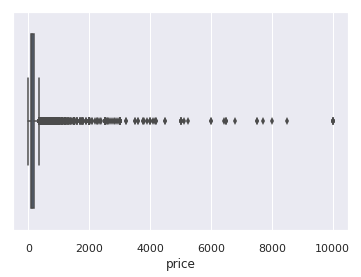

In [8]:
sns.boxplot(x= df['price']) # correct the range of box plot or remove it
#explain what this boxplot is depicting here instead of what box plot represents in general

> > > This type of graph is used to show the shape of the distribution, its central value, and its variability.
> > 
> > > It is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set.

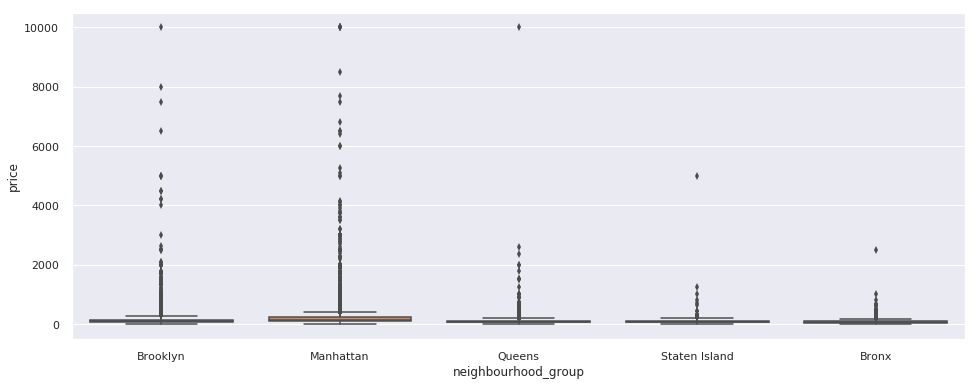

In [9]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)

> > > The graph above is depicting outliers for different neighbourhood groups.

> >  Outliers can be defined as an observation that lies an abnormal distance from other values in a random sample from a population.


** Plot showing top 10 neighbourhoods with highest hotel prices.**

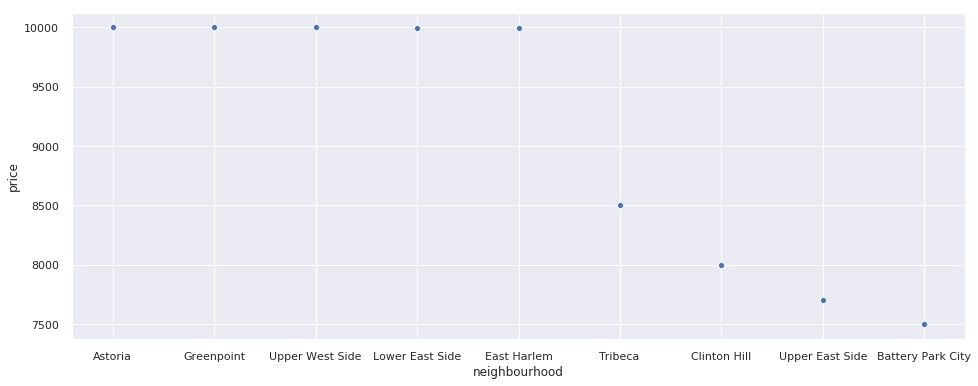

In [10]:
#method1
plt.figure(figsize=(16, 6))
sns.scatterplot(x="neighbourhood", y="price", data=df.sort_values('price', ascending=False).head(10))

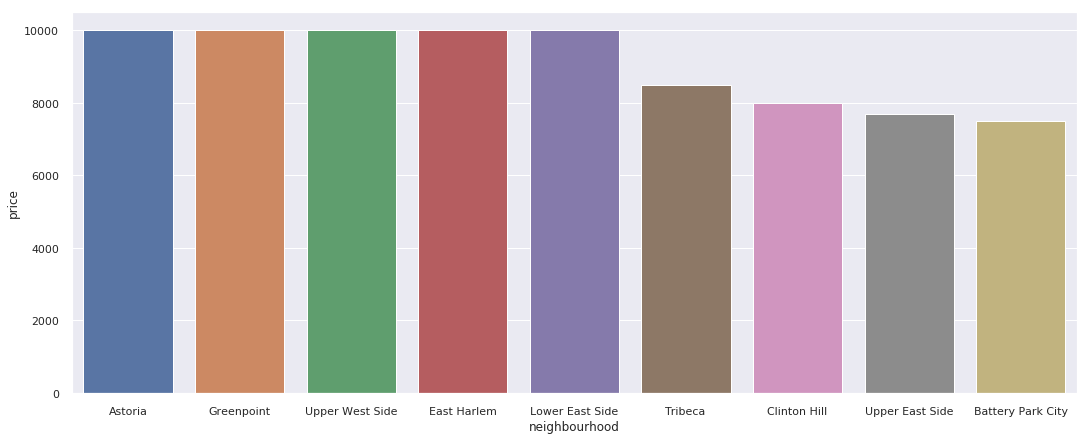

In [11]:
#method2
plt.figure(figsize =(18,7))
sns.barplot(x="neighbourhood", y="price", data=df.nlargest(10,['price']))

** Neighbourhood’s average price so that I am able to pick an economical location to book my hotel.**

In [12]:
print ("Total Neighbourhoods: ", len(np.unique(df.neighbourhood)))

Total Neighbourhoods:  221


In [13]:
#using groupby to group two columns neighbourhood and price also find mean of price along with sorting the values and resetting index
df_top_prices_by_neighbourhood = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

In [14]:
#showing columns in dataframe
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

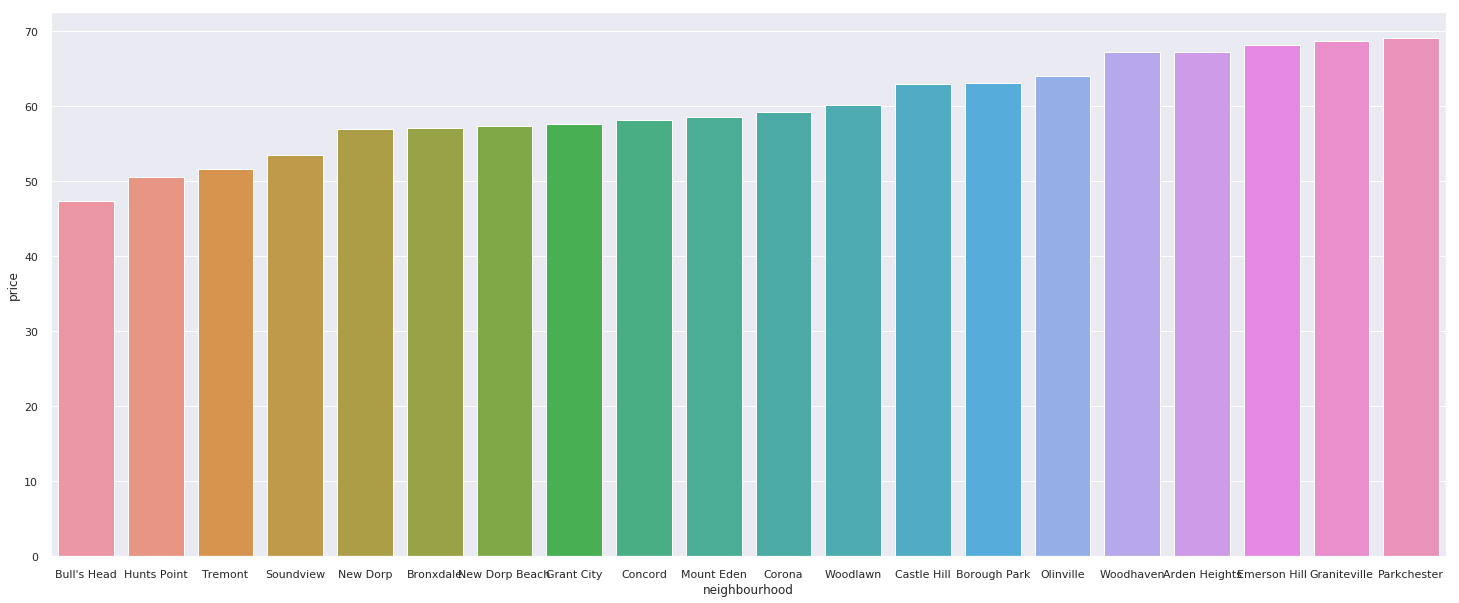

In [15]:
plt.figure(figsize=(25, 10))
sns.barplot(x="neighbourhood", y="price", data=df_top_prices_by_neighbourhood.head(20))

**10 most popular hosts based on number_of_reviews**

In [16]:
df_host_popularity = df.groupby('host_id').agg({'number_of_reviews': 'sum'})

In [17]:
#finding total_reviews
total_reviews = df.number_of_reviews.sum()
total_reviews

1138005

In [18]:
df_host_popularity['popularity_index'] = df_host_popularity['number_of_reviews']. \
                                                apply(lambda x: x/float(total_reviews)*100)

In [19]:
#sorting and showing top 10 values
df_host_popularity.sort_values('popularity_index', ascending=False).head(10)

number_of_reviews  popularity_index
host_id                                       
37312959                2273          0.199736
344035                  2205          0.193760
26432133                2017          0.177240
35524316                1971          0.173198
40176101                1818          0.159753
4734398                 1798          0.157996
16677326                1355          0.119068
6885157                 1346          0.118277
219517861               1281          0.112565
23591164                1269          0.111511

In [20]:
df_host_popularity = df_host_popularity.reset_index()
#deleting number_of_reviews column
del df_host_popularity['number_of_reviews']

In [21]:
df_host_popularity.head(10)

host_id  popularity_index
0     2438          0.000088
1     2571          0.002373
2     2787          0.009227
3     2845          0.004042
4     2868          0.000176
5     2881          0.034270
6     3151          0.000088
7     3211          0.001845
8     3415          0.000351
9     3563          0.000088

In [22]:
#merging dataframes
df = pd.merge(df, df_host_popularity)

In [23]:
df.head()

id                                               name  host_id  \
0      2539                 Clean & quiet apt home by the park     2787   
1   7937553  Riomaggiore Room. Queen Bedroom in Bklyn Townh...     2787   
2  10160215                               Torre del Lago Room.     2787   
3  10267242  Cinque Terre Room.  Clean and Quiet Queen Bedroom     2787   
4  10593675  La Spezia room.  Clean, quiet and comfortable bed     2787   

  host_name neighbourhood_group neighbourhood  latitude  longitude  \
0      John            Brooklyn    Kensington  40.64749  -73.97237   
1      John            Brooklyn   Bensonhurst  40.60951  -73.97622   
2      John            Brooklyn     Gravesend  40.60755  -73.97410   
3      John            Brooklyn     Gravesend  40.60810  -73.97541   
4      John            Brooklyn   Bensonhurst  40.60951  -73.97642   

      room_type  price  minimum_nights  number_of_reviews last_review  \
0  Private room    149               1                  9  2018-10-19   
1  Private room     99               1                 21  2018-10-27   
2  Private room     79               1                 17  2019-06-26   
3  Private room    149               1                 24  2019-05-11   
4   Shared room     79               1                 15  2018-09-29   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.50                               6               153   
2               0.40                               6               174   
3               0.64                               6               180   
4               0.43                               6               180   

   popularity_index  
0          0.009227  
1          0.009227  
2          0.009227  
3          0.009227  
4          0.009227

**Top locations where people tend to stay for a longer duration (more than a week) and sorted by their popularity index**

In [24]:
#df[df.minimum_nights > 7].sort_values('popularity_index', ascending=False).head(20)['neighbourhood']
p_inde_filtered = df.filter(["neighbourhood","minimum_nights",'popularity_index'])
new = p_inde_filtered.query('minimum_nights>7')
new1 = new.sort_values('popularity_index', ascending=False).head(20)
new1['neighbourhood']


40292    Financial District
40268    Financial District
40266      Theater District
40265    Financial District
40264        Hell's Kitchen
40263    Financial District
40262       Upper East Side
40261    Financial District
40260    Financial District
40259    Financial District
40258           Murray Hill
40257           Murray Hill
40256      Theater District
40255        Hell's Kitchen
40254        Hell's Kitchen
40157           Murray Hill
40253           Murray Hill
40252           Murray Hill
40251           Murray Hill
40250        Hell's Kitchen
Name: neighbourhood, dtype: object

**The most popular regions based on the host_id’s popularity_index**


In [25]:
df_popular_regions = df.groupby('neighbourhood').agg({'popularity_index': 'sum'}).reset_index()

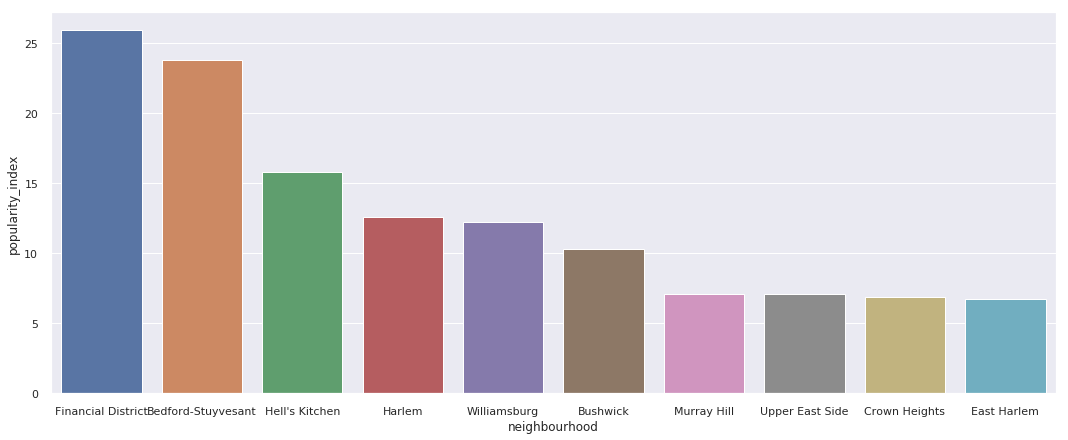

In [26]:
plt.figure(figsize=(18, 7))
sns.barplot(x='neighbourhood', y='popularity_index', data=df_popular_regions.sort_values('popularity_index', 
                                                                                        ascending=False).head(10))

**Which neighbourhood is generating maximum and minimum revenues in terms of private rooms,shared rooms and entire homes?**

In [27]:
df_n_roomtype = df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df_n_roomtype

price
neighbourhood room_type             
Allerton      Entire home/apt   1969
              Private room      1710
Arden Heights Entire home/apt    228
              Private room        41
Arrochar      Entire home/apt   1897
...                              ...
Woodlawn      Shared room         70
Woodrow       Entire home/apt    700
Woodside      Entire home/apt   9369
              Private room     10564
              Shared room         65

[540 rows x 1 columns]

In [28]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood'], columns=['room_type'])

In [29]:
#Maximum revenue in Private Rooms
df_n_roomtype.sort_values('Private room', ascending = False).head(1)

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0

In [30]:
#Minimum revenue in Private Rooms
df_n_roomtype.sort_values('Private room', ascending = True).head(1)

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Graniteville             186.0          20.0          NaN

In [31]:
#Maximum revenue in Entire home/apt
df_n_roomtype.sort_values('Entire home/apt', ascending = False).head(1)

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0

In [32]:
#Minimum revenue in Entire home/apt
df_n_roomtype.sort_values('Entire home/apt', ascending = True).head(1)

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
New Dorp                  57.0           NaN          NaN

In [33]:
#Maximum revenue in Shared room
df_n_roomtype.sort_values('Shared room', ascending = False).head(1)

room_type       Entire home/apt  Private room  Shared room
neighbourhood                                             
Hell's Kitchen         301786.0       89713.0       9488.0

In [34]:
#Minimum revenue in Shared room
df_n_roomtype.sort_values('Shared room', ascending = True).head(1)

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Randall Manor           5859.0         512.0         13.0

**The average price income for private rooms,shared rooms and entire homes for each of the neighbourhoods is shown below.**

In [35]:
df_neighbourhood_room_type_mean = df.groupby(['neighbourhood', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()

In [36]:
#renaming a column
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.rename(columns = {'price': 'average_region_price'})
#creating a pivot table
df_neighbourhood_room_type_mean_pivot = pd.pivot_table(df_neighbourhood_room_type_mean, values='average_region_price', 
                           index=['neighbourhood'], columns=['room_type'])

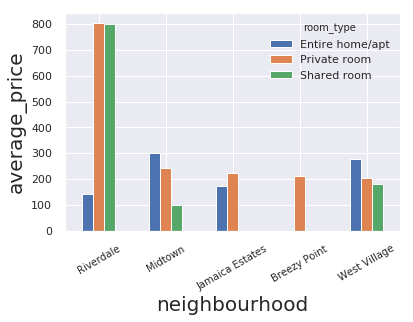

In [37]:
#Plotting 
import matplotlib.pyplot as plt
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
labels=list(df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:5])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()
# fig_size = plt.rcParams["figure.figsize"]
# plt.figure(figsize=(20,10))
# #fig_size[0] = 20
# #fig_size[1] = 10
# #ax = plt.gca()
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(20) 
#     tick.label.set_rotation('horizontal')
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(16)     
# # plt.rcParams["figure.figsize"] = fig_size
# plt.legend(prop={'size':'15'})
# plt.show(ax)

> > > The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

**Host_id’s popularity in its neighbourhood**

In [38]:
df_neighbourhood_sum = df.groupby('neighbourhood').agg({'number_of_reviews': 'sum'}).reset_index()

In [39]:
df_neighbourhood_host_sum = df.groupby(['host_id', 'neighbourhood']).agg({'number_of_reviews': 'sum'}).reset_index()

In [40]:
#renaming columns
df_neighbourhood_sum = df_neighbourhood_sum.rename(columns = {'number_of_reviews': 'sum_of_reviews'})

In [41]:
#merging
df_neighbourhood_host_merged = pd.merge(df_neighbourhood_host_sum, df_neighbourhood_sum)

In [42]:
df_neighbourhood_host_merged.head()

host_id neighbourhood  number_of_reviews  sum_of_reviews
0     2438  Williamsburg                  1           85427
1    10889  Williamsburg                383           85427
2    15991  Williamsburg                148           85427
3    19402  Williamsburg                 37           85427
4    21207  Williamsburg                  9           85427

In [43]:
df_neighbourhood_host_merged['host_neighbourhood_popularity'] = df_neighbourhood_host_merged.apply(lambda x: x['number_of_reviews']/float(x['sum_of_reviews'])*100 \
                                       if x['sum_of_reviews'] != 0 else 0, 
                                                                   axis=1)

In [44]:
df_neighbourhood_host_merged.sort_values('host_neighbourhood_popularity', ascending=False).head()

host_id neighbourhood  number_of_reviews  sum_of_reviews  \
37937    6402171     Rossville                 21              21   
38311  200754542  Breezy Point                  5               5   
35750     310670   Eastchester                157             157   
38308  115827173   Willowbrook                  9               9   
38274   71312760  Richmondtown                 79              79   

       host_neighbourhood_popularity  
37937                          100.0  
38311                          100.0  
35750                          100.0  
38308                          100.0  
38274                          100.0

In [45]:
#deleting columns
del df_neighbourhood_host_merged['sum_of_reviews']
del df_neighbourhood_host_merged['number_of_reviews']

In [46]:
df_neighbourhood_host_merged[df_neighbourhood_host_merged['neighbourhood'] == 'Baychester']

host_id neighbourhood  host_neighbourhood_popularity
38259   57165692    Baychester                      88.709677
38260   64425305    Baychester                       0.967742
38261  129890157    Baychester                       0.000000
38262  209306758    Baychester                       6.774194
38263  246653349    Baychester                       3.548387

In [47]:
df = pd.merge(df, df_neighbourhood_host_merged)

In [48]:
df[df.host_neighbourhood_popularity > 90] \
[['host_id', 'host_name', 'neighbourhood', 'neighbourhood_group', 'host_neighbourhood_popularity']]

host_id  host_name neighbourhood neighbourhood_group  \
347       310670        Vie   Eastchester               Bronx   
348       310670        Vie   Eastchester               Bronx   
349       310670        Vie   Eastchester               Bronx   
350       310670        Vie   Eastchester               Bronx   
351       310670        Vie   Eastchester               Bronx   
352       310670        Vie   Eastchester               Bronx   
353       310670        Vie   Eastchester               Bronx   
354       310670        Vie   Eastchester               Bronx   
355       310670        Vie   Eastchester               Bronx   
356       310670        Vie   Eastchester               Bronx   
357       310670        Vie   Eastchester               Bronx   
358       310670        Vie   Eastchester               Bronx   
359       310670        Vie    Co-op City               Bronx   
17865   71312760        Don  Richmondtown       Staten Island   
23490  115827173      David   Willowbrook       Staten Island   
27220   18996093    Leonard   Little Neck              Queens   
27221   18996093    Leonard   Little Neck              Queens   
31280  164164069     Marcia   Westerleigh       Staten Island   
32887  148130073  Sebastian   Grymes Hill       Staten Island   
35278    6402171      Taryn     Rossville       Staten Island   
35680  200754542       Kent  Breezy Point              Queens   
35681  200754542       Kent  Breezy Point              Queens   

       host_neighbourhood_popularity  
347                       100.000000  
348                       100.000000  
349                       100.000000  
350                       100.000000  
351                       100.000000  
352                       100.000000  
353                       100.000000  
354                       100.000000  
355                       100.000000  
356                       100.000000  
357                       100.000000  
358                       100.000000  
359                        94.117647  
17865                     100.000000  
23490                     100.000000  
27220                      94.736842  
27221                      94.736842  
31280                      94.444444  
32887                      93.243243  
35278                     100.000000  
35680                     100.000000  
35681                     100.000000

**Average price income for private rooms and entire homes for each of the neighbourhoods?**

In [49]:
df_neighbourhood_room_type_mean = df[df['room_type'] != 'Shared room'].groupby(['neighbourhood', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()

In [50]:
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.rename(columns = {'price': 'average_region_price'})

In [51]:
df = pd.merge(df, df_neighbourhood_room_type_mean)

In [52]:
df[df['neighbourhood'] == 'Baychester']

id                                               name    host_id  \
47322  11020169  Luxurious  one bedroom apartment in a quiet area.   57165692   
47323  18872858                 Elegant  Studio in a great cottage   57165692   
47324  32789261               Spacious 2 bedroom apt in quiet area  246653349   
47571  18240632                                    Bronx Apartment   64425305   
47572  18685854                              PEACE AND TRANQUILITY  129890157   
47573  27724217                       Warm and Friendly Bronx Home  209306758   
47574  27756639                      Comfortable Place with Dimple  209306758   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
47322   Charles               Bronx    Baychester  40.87223  -73.84335   
47323   Charles               Bronx    Baychester  40.87188  -73.84200   
47324      Juan               Bronx    Baychester  40.86940  -73.84171   
47571      Posh               Bronx    Baychester  40.87372  -73.84065   
47572   Pauline               Bronx    Baychester  40.87192  -73.84676   
47573   Harriet               Bronx    Baychester  40.87886  -73.84301   
47574   Harriet               Bronx    Baychester  40.87730  -73.84329   

             room_type  price  minimum_nights  number_of_reviews last_review  \
47322  Entire home/apt     95               3                206  2019-07-01   
47323  Entire home/apt     75               4                 69  2019-07-06   
47324  Entire home/apt    101               2                 11  2019-06-30   
47571     Private room     75               1                  3  2017-06-05   
47572     Private room     60               1                  0         NaN   
47573     Private room     69               3                  9  2019-06-11   
47574     Private room     53               3                 12  2019-06-14   

       reviews_per_month  calculated_host_listings_count  availability_365  \
47322               4.98                               2               144   
47323               2.68                               2               119   
47324               3.40                               1                46   
47571               0.11                               1               129   
47572                NaN                               2                 0   
47573               0.87                               2               311   
47574               1.20                               2               356   

       popularity_index  host_neighbourhood_popularity  average_region_price  
47322          0.024165                      88.709677             90.333333  
47323          0.024165                      88.709677             90.333333  
47324          0.000967                       3.548387             90.333333  
47571          0.000264                       0.967742             64.250000  
47572          0.000264                       0.000000             64.250000  
47573          0.001845                       6.774194             64.250000  
47574          0.001845                       6.774194             64.250000

In [53]:
df_neighbourhood_room_type_mean_pivot = pd.pivot_table(df_neighbourhood_room_type_mean, values='average_region_price', 
                           index=['neighbourhood'], columns=['room_type'])

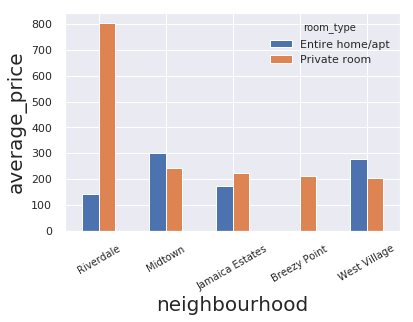

In [54]:
#Plotting 


import matplotlib.pyplot as plt
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
labels=list(df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:5])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

**Relative price difference of that host with respect to the neighbourhood’s average pricing**

In [55]:
df['region_price_margin'] = df.apply(lambda x: ((x['price'] - x['average_region_price'])/x['price'])*100 if x['price'] != 0 else 0, axis=1)

In [56]:
df.head()

id                                            name  host_id host_name  \
0    2539              Clean & quiet apt home by the park     2787      John   
1   63546                  Large and Cozy Private Bedroom   308652   Antonín   
2  125594              SUPER BIG AND COZY PRIVATE BEDROOM   308652   Antonín   
3  267652           Private clean pleasant spacious room.   164675    Janice   
4  656281  QUIET, SPACIOUS, COMFORTABLE, & GREAT LOCATION  3180741     Manon   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   
1            Brooklyn    Kensington  40.64106  -73.97426  Private room     39   
2            Brooklyn    Kensington  40.64302  -73.97255  Private room     39   
3            Brooklyn    Kensington  40.64277  -73.97296  Private room     60   
4            Brooklyn    Kensington  40.64573  -73.98013  Private room     72   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   
1               1                 45  2019-05-16               0.46   
2               1                 82  2019-05-19               0.94   
3               2                 20  2019-01-21               0.42   
4               1                 48  2019-02-28               0.59   

   calculated_host_listings_count  availability_365  popularity_index  \
0                               6               365          0.009227   
1                               2               365          0.011160   
2                               2               365          0.011160   
3                               1               347          0.001757   
4                               1               312          0.004218   

   host_neighbourhood_popularity  average_region_price  region_price_margin  
0                       0.302826             59.377551            60.149295  
1                       4.273217             59.377551           -52.250131  
2                       4.273217             59.377551           -52.250131  
3                       0.672948             59.377551             1.037415  
4                       1.615074             59.377551            17.531179